In [1]:
%matplotlib widget
import sys  
sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
from amftrack.pipeline.functions.post_processing.extract_study_zone import *
import pandas as pd
import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.paths.directory import run_parallel, find_state, directory_scratch, directory_project
from amftrack.notebooks.analysis.util import * 
from scipy import stats
from scipy.ndimage.filters import uniform_filter1d
from collections import Counter
from IPython.display import clear_output
from amftrack.notebooks.analysis.data_info import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams.update({
    "font.family": "verdana",
'font.weight' : 'normal',
'font.size': 20})
from amftrack.plotutil import plot_node_skel
from amftrack.notebooks.validation.util import *
from amftrack.pipeline.paths.directory import *
from amftrack.util import *
import pickle
from amftrack.pipeline.functions.post_processing.extract_study_zone import load_study_zone
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import Experiment, save_graphs, load_graphs, load_skel


In [2]:
directory = directory_project
# update_analysis_info(directory)
analysis_info = get_analysis_info(directory)

In [3]:
select = analysis_info 
num = 4
rows = [row for (index, row) in select.iterrows()]
for index,row in enumerate(rows):
    path = f'{directory}{row["folder_analysis"]}'
    print(index,row["Plate"])
    try:
        a = np.load(f'{path}/center.npy')
    except:
        print(index,row["Plate"])
    if index == num:
        path_exp = f'{directory}{row["path_exp"]}'
        exp = pickle.load(open(path_exp, "rb"))
        exp.dates.sort()
        break

0 799
1 790
2 800
3 22
3 22
4 80


In [4]:
hyph = choice(exp.hyphaes)

In [5]:
hyph.ts

[38, 39, 40, 41, 42, 43, 44, 45, 46]

findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


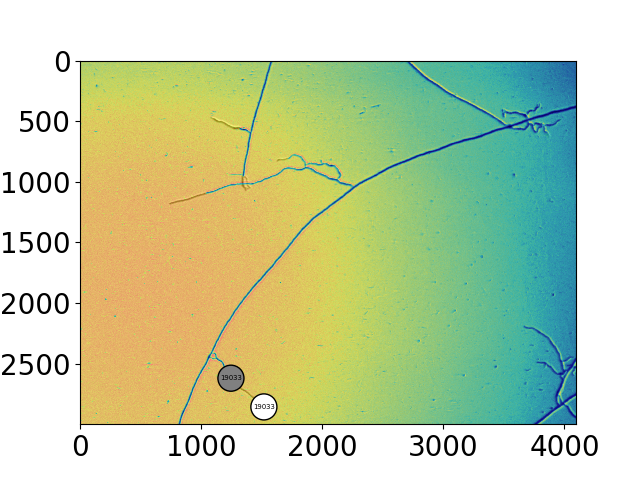

In [6]:
plt.close('all')
t = hyph.ts[0]
tp1 = t+1
hyph.end.show_source_image(t,tp1)

In [7]:
load_study_zone(exp)
load_graphs(exp,labeled=True,indexes = [t,tp1])
load_skel(exp,[t,tp1])

In [9]:
hyph.get_nodes_within(t)

([19015, 19019, 19033], [Edge(19015,19019), Edge(19019,19033)])

In [8]:
get_speed(hyph,t,tp1,None)
get_timestep(hyph,t,tp1,None)
get_degree(hyph,t,tp1,None)
get_width_tip_edge(hyph,t,tp1,None)
get_width_root_edge(hyph,t,tp1,None)
get_width_average(hyph,t,tp1,None)
get_timestep_init(hyph,t,tp1,None)
get_time_init(hyph,t,tp1,None)
has_reached_final_pos(hyph,t,tp1,None)
local_density(hyph,t,tp1,[1000])
local_density(hyph,t,tp1,[500])
local_density(hyph,t,tp1,[2000])
in_ROI(hyph,t,tp1,[2000])

('speed', 159.8542088647885)

('timestep', 38)

('degree', 1)

('width_tip_edge', 8.296408207778246)

('width_root_edge', 8.168785884492257)

('av_width', 8.266330707226807)

('timestep_init', 38)

('time_init', 163.18333333333334)

('has_reached_final_pos', False)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/scipy/sparse/sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


('density_window1000', 1273.623188405797)

('density_window500', 3383.1884057971015)

('density_window2000', 1826.0869565217392)

('in_ROI', True)